# Pymaceuticals Inc.
---

### Analysis

- There seems to be no correlation with drug effectiveness and gender type as both Female and Male test mice have a balanced population.
- Based on the population of mice treated with Capomulin and the results presented we can make the assumption that Capomulin is the most effective in reducing tumors.
- The regression analysis depicts the amount that the average volume of a tumor will vary in response to changes in the weight of the mouse, through a positive slope on the line of regression.
 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_dfs=pd.merge(mouse_metadata,study_results,how="right")
# Display the data table for preview
combined_dfs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [10]:
# Checking the number of mice.
# combined_dfs["Mouse ID"].nunique()
unique_mice = combined_dfs['Mouse ID'].unique()
num_mice = len(unique_mice)

num_mice


249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_dfs.loc[combined_dfs.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()

print(duplicate)

['g989']


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=combined_dfs.loc[combined_dfs["Mouse ID"]=='g989',:]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= combined_dfs[combined_dfs["Mouse ID"].isin(duplicate_df["Mouse ID"])==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [16]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_df=clean_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
median_df=clean_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
variance_df=clean_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
stdev_df=clean_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sem_df=clean_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

summary_df=pd.DataFrame({"Mean Tumor Volume":mean_df,
                       "Median Tumor Volume":mean_df,
                        "Tumor Volume Variance":variance_df,
                         "Tumor Volume Std. Dev":stdev_df,
                         "Tumor Volume Std. Err.":sem_df})
summary_df


C:\Users\4jnav\AppData\Local\Temp\ipykernel_30676\2806048174.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df=clean_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
C:\Users\4jnav\AppData\Local\Temp\ipykernel_30676\2806048174.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df=clean_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
C:\Users\4jnav\AppData\Local\Temp\ipykernel_30676\2806048174.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaner_df=clean_df.groupby(["Drug Regimen"])[['Tumor Volume (mm3)']].agg(["mean","median","var","std","sem"])

cleaner_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

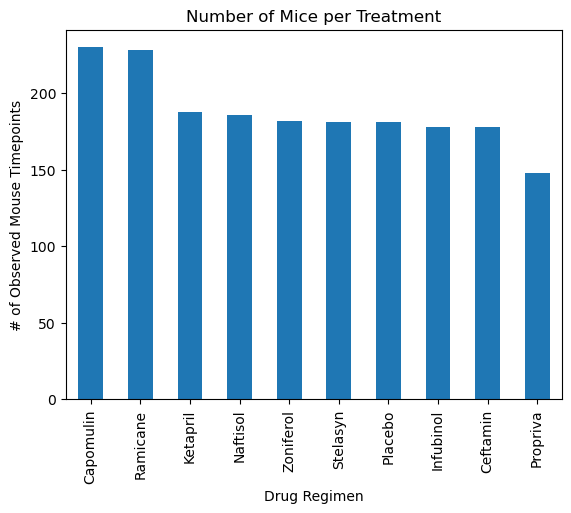

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs=clean_df['Drug Regimen'].value_counts()
drugs.plot(kind="bar",xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints",title="Number of Mice per Treatment")
plt.show()

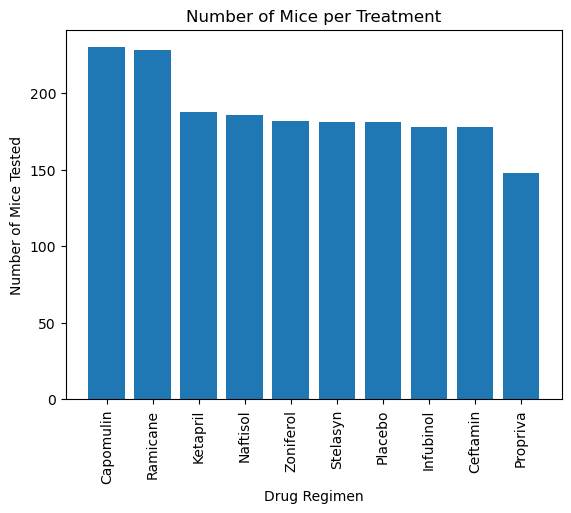

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=drugs.index.values
y_axis=drugs.values
plt.bar(x_axis,y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

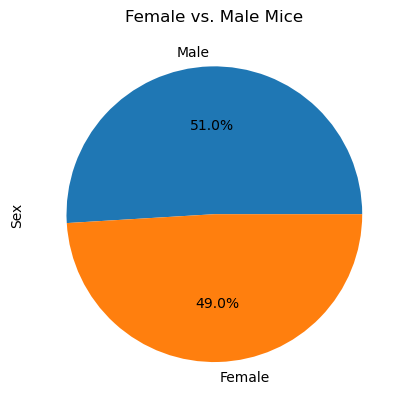

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender=clean_df["Sex"].value_counts()
mice_gender.plot(kind="pie",autopct="%1.1f%%",title="Female vs. Male Mice")
plt.show()

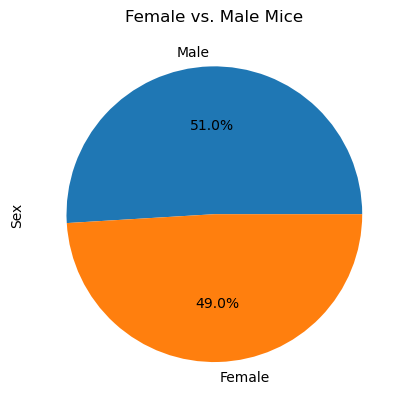

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=mice_gender
labels=['Male','Female']
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title("Female vs. Male Mice")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tp_df=max_tp_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_tp_df.merge(clean_df,on=["Mouse ID","Timepoint"])
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
types_of_drugs=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

drug_values=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in types_of_drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    
    # add subset 
    drug_values.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


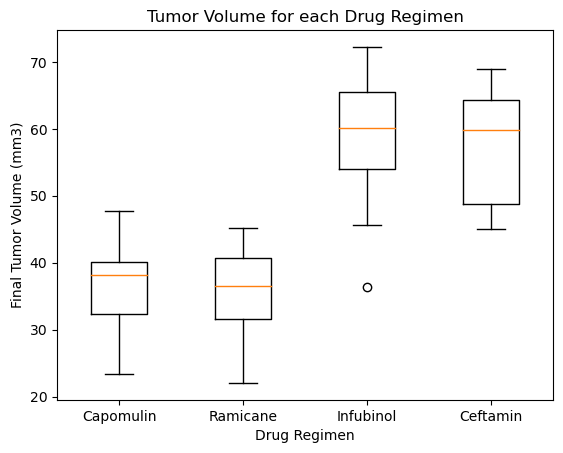

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for each Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(drug_values, labels=types_of_drugs, vert=True)

plt.show()

## Line and Scatter Plots

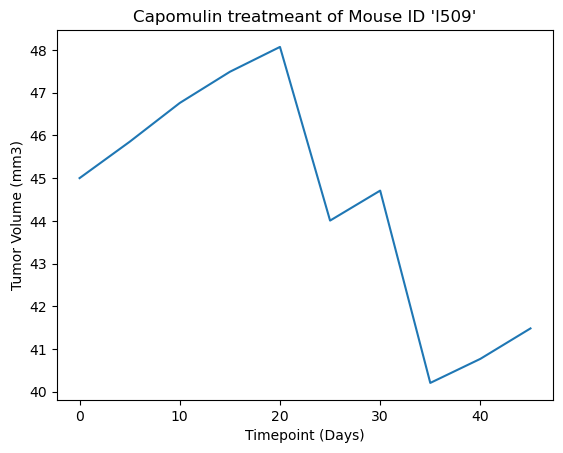

In [46]:
#  Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
treated_capomulin=capomulin.loc[capomulin["Mouse ID"]=="l509",:]

x=treated_capomulin["Timepoint"]
y=treated_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatmeant of Mouse ID 'l509'")
plt.plot(x,y)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

C:\Users\4jnav\AppData\Local\Temp\ipykernel_30676\4108862648.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capom = capomulin.groupby(['Mouse ID']).mean()


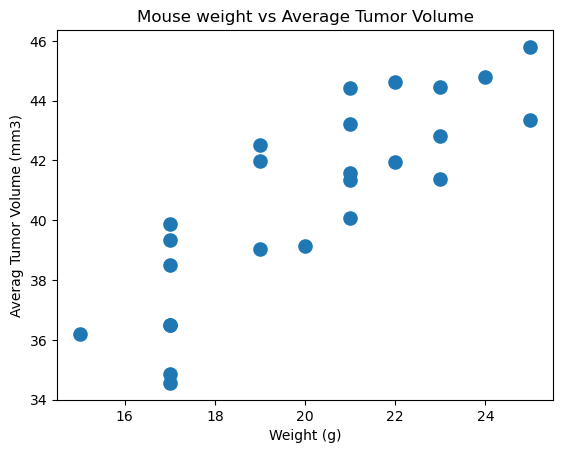

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capom = capomulin.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots()
# marker_size=14
plt.scatter(avg_capom['Weight (g)'],avg_capom['Tumor Volume (mm3)'],s=90)
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


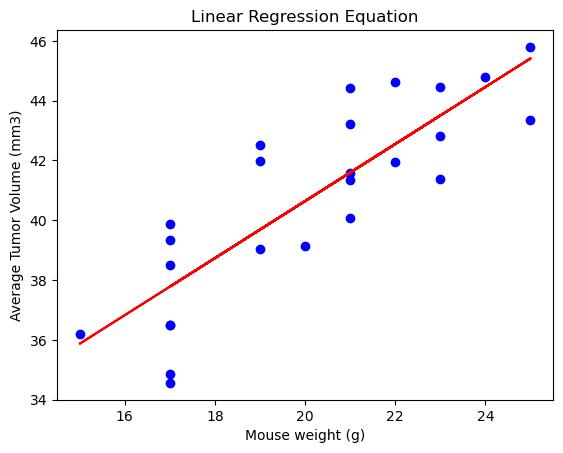

In [59]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(avg_capom['Weight (g)'],avg_capom['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

x_values = avg_capom['Weight (g)']
y_values = avg_capom['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Equation")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
